In [2]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools

#penguins data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [8]:
penguins["Species"] = penguins["Species"].str.split().str.get(0)

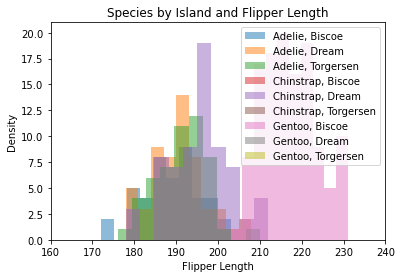

In [17]:
fig.set_figheight(15)
fig.set_figwidth(10)

fig, ax = plt.subplots(1)
species = set(penguins['Species'])
location = set(penguins['Island'])

ax.set(xlabel = 'Flipper Length', 
       ylabel = 'Density', 
       title = 'Species by Island and Flipper Length')

for s in species: 
    i = penguins[penguins['Species'] == s]
    for l in location:
        t = i[i['Island'] == l]
        ax.hist(t['Flipper Length (mm)'], label = str(s + ', ' + l), alpha = 0.5)
        ax.set_xlim([160,240])

ax.legend()

This graph shows us the correlation between the flipper length of each species on seperated by island. However this graph is really convoluted and we cannot see the data clearly.

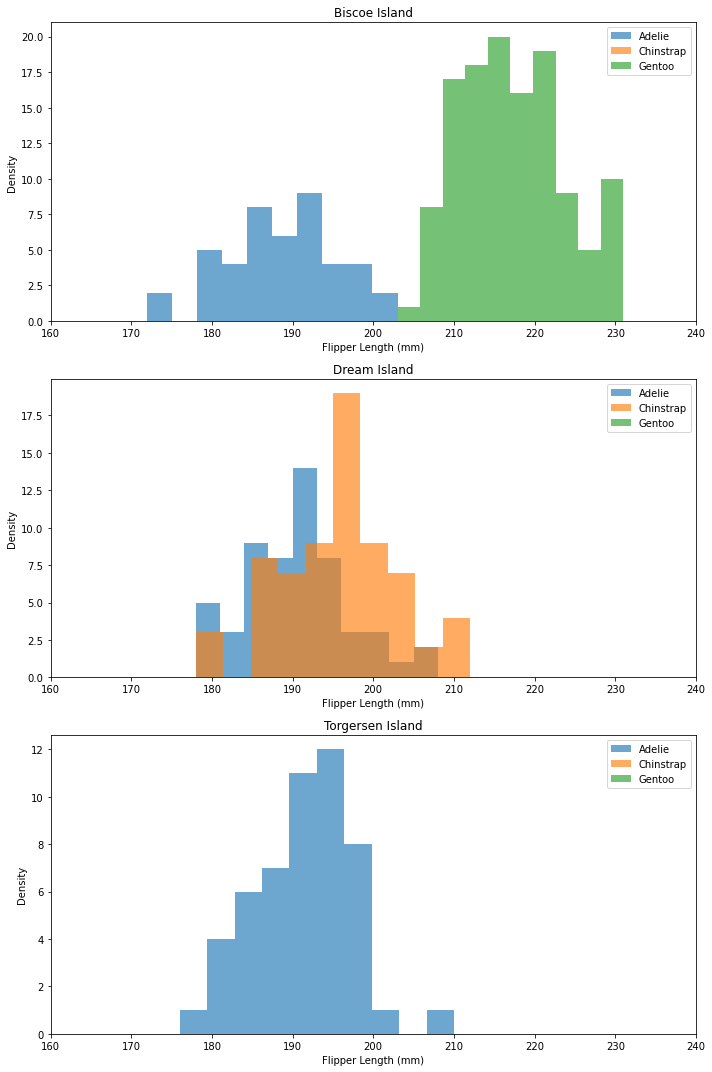

In [18]:

fig, ax = plt.subplots(3)
species = set(penguins['Species'])
location = set(penguins['Island'])

fig.set_figheight(15)
fig.set_figwidth(10)

count = 0
for l in location: 
   
    for s in species:
        i = penguins[penguins['Species'] == s]
        t = i[i['Island'] == l]
        ax[count].hist(t['Flipper Length (mm)'], label = str(s), alpha = 0.65)
    ax[count].legend()
    ax[count].set(xlabel = 'Flipper Length (mm)', ylabel = 'Density')
    ax[count].set_title(str(l) + ' Island')
    ax[count].set_xlim([160,240])
    count += 1
plt.tight_layout()

When we seperate the penguins by island, we are able to get a clearer view of what penguin is where. We can see that Adelie penguin is on all 3 islands. However the Chinstrap is only on Dream island, and the Gentoo is only on Biscoe. As the Adelie is on all 3 islands, we can see that its flipper length remains the relatively the same on each island. However, factors such as competition will cause changes the bell curve. There is more of a spread on Biscoe where the Adelie must compete with the larger Gentoo. We can also see that the Adelie and Chinstrap have are similar in size so the bell curve remains tight. These graphs can tell us that island may be able to help us predict the species. The flipper length will also be able to help differentiate the Gentoo from the other two but the Adelie and Chinstrap are relatively the same size. 

In [ ]:
'''
check_race = df['race']
check_race.to_numpy()

data = df[['risk_score_t', 'gagne_sum_t','race',  'dem_female']]
#seperate dataframes by gender 
data_m = data[data['dem_female'] == 0] #male patients
data_f = data[data['dem_female'] == 1] #female patients

#number of each gender
len(data_m) #18021
len(data_f) #30763

#finding percentiles
#use forumla to find rank, mult by 100 and round function to get percentile
data_m['percentile'] = round((data_m['risk_score_t'].rank() / len(data_m)) * 100)
data_f['percentile'] = round((data_f['risk_score_t'].rank() / len(data_f)) * 100)


# dropping risk score because it was only needed to calculate percentiles
summary = data.drop(['risk_score_t'], axis = 1) 
# grouping data by gender, race, then percentile 
summary = summary.groupby(['dem_female', 'race', 'percentile'])
# mean_ill represents the means of gagne_sum_t as categorized by gender, race, then percentile
mean_ill = summary.aggregate([np.mean])


#get mean number of ill onto list
ill_list = mean_ill.values.tolist()
#counter to keep track of index
counter = 0 
#use for loop to get corresponding percentile 
for name, group in summary:
    ill_list[counter].append(name[2])
    counter += 1

'''
When we used the groupby function we did it in the order of gender, race, then percentile 
We can extract 4 different by seperating when percentile decreases (because that represents a new group)

Group 1: male, black        
Group 2: male, white        
Group 3: female, black     
Group 4: female, white      

Can use code in line below to see how the list was divided 
    print(mean_ill.to_string())
'''

#create list of to hold list for seperate groups  
my_groups = []
start = 0

#for loop to split main list into 4 different groups
for i in range(1, len(arr)):
    #splice list if current index is less than previous index
    if arr[i][1] < arr[i-1][1]:
        my_groups.append(ill_list[start:i])
        start = i
my_groups.append(ill_list[start:])




'''